In [10]:
from tardis import run_tardis
from tardis.io.atom_data.util import download_atom_data

/home/student/anaconda3/envs/tardis/lib/python3.6/importlib/_bootstrap.py:219: QAWarning: pyne.data is not yet QA compliant.
  return f(*args, **kwds)
/home/student/Downloads/tardis/tardis/io/util.py:14: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  from tqdm.autonotebook import tqdm


In [11]:
download_atom_data('kurucz_cd23_chianti_H_He')

[tardis.io.atom_data.atom_web_download][INFO   ]  Downloading atomic data from https://media.githubusercontent.com/media/tardis-sn/tardis-refdata/master/atom_data/kurucz_cd23_chianti_H_He.h5 to /home/student/Downloads/tardis-data/kurucz_cd23_chianti_H_He.h5 (atom_web_download.py:47)


In [12]:
sim = run_tardis('tardis_example.yml')

[tardis.plasma.standard_plasmas][INFO   ]  Reading Atomic Data from kurucz_cd23_chianti_H_He.h5 (standard_plasmas.py:74)
[tardis.io.atom_data.util][INFO   ]  Atom Data kurucz_cd23_chianti_H_He.h5 not found in local path. Exists in TARDIS Data repo /home/student/Downloads/tardis-data/kurucz_cd23_chianti_H_He.h5 (util.py:29)
[py.warnings         ][WARNING]  /home/student/anaconda3/envs/tardis/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3331: PerformanceWarning: indexing past lexsort depth may impact performance.
  exec(code_obj, self.user_global_ns, self.user_ns)
 (warnings.py:99)
[tardis.io.atom_data.base][INFO   ]  Read Atom Data with UUID=6f7b09e887a311e7a06b246e96350010 and MD5=864f1753714343c41f99cb065710cace. (base.py:184)
[tardis.io.atom_data.base][INFO   ]  Non provided atomic data: synpp_refs, photoionization_data (base.py:187)
[tardis.simulation.base][INFO   ]  Starting iteration 1/20 (base.py:268)
[tardis.simulation.base][INFO   ]  Luminosity emitted = 7.96915

[tardis.simulation.base][INFO   ]  t_inner 10123.177 K -- next t_inner 11180.783 K (base.py:352)
[tardis.simulation.base][INFO   ]  Starting iteration 10/20 (base.py:268)
[tardis.simulation.base][INFO   ]  Luminosity emitted = 1.28170e+43 erg / s Luminosity absorbed = 4.19511e+42 erg / s Luminosity requested = 1.05928e+43 erg / s (base.py:359)
[tardis.simulation.base][INFO   ]  Plasma stratification:
	              t_rad    next_t_rad         w    next_w
	Shell                                                
	0      10666.223660  11427.410445  0.445097  0.500788
	5      11000.288585  11612.349822  0.163424  0.193129
	10     10822.884326  11373.245169  0.101641  0.121622
	15     10384.181273  11047.955461  0.078432  0.090937

 (base.py:350)
[tardis.simulation.base][INFO   ]  t_inner 11180.783 K -- next t_inner 10164.432 K (base.py:352)
[tardis.simulation.base][INFO   ]  Starting iteration 11/20 (base.py:268)
[tardis.simulation.base][INFO   ]  Luminosity emitted = 8.79074e+42 erg / s Lum

[tardis.simulation.base][INFO   ]  t_inner 10314.623 K -- next t_inner 11009.102 K (base.py:352)
[tardis.simulation.base][INFO   ]  Starting iteration 20/20 (base.py:268)
[tardis.simulation.base][INFO   ]  Luminosity emitted = 1.21062e+43 erg / s Luminosity absorbed = 3.88405e+42 erg / s Luminosity requested = 1.05928e+43 erg / s (base.py:359)
[tardis.simulation.base][INFO   ]  Simulation finished in 20 iterations and took 35.23 s (base.py:308)


Populating the interactive namespace from numpy and matplotlib


(3000, 9000)

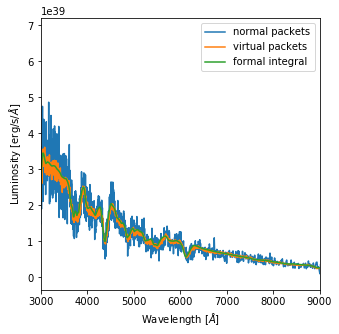

In [17]:
%pylab notebook

spectrum = sim.runner.spectrum
spectrum_virtual = sim.runner.spectrum_virtual
spectrum_integrated = sim.runner.spectrum_integrated

plot(spectrum.wavelength, spectrum.luminosity_density_lambda, label='normal packets')
plot(spectrum.wavelength, spectrum_virtual.luminosity_density_lambda, label='virtual packets')
plot(spectrum.wavelength, spectrum_integrated.luminosity_density_lambda, label='formal integral')
xlabel('Wavelength [$\AA$]')
ylabel('Luminosity [erg/s/$\AA$]')
legend()
xlim(3000, 9000)

# Visualising TARDIS Data as network-graph

# Importing TARDIS Data

In [5]:
import pandas as pd

data = pd.HDFStore('/home/student/Downloads/tardis-data/kurucz_cd23_chianti_H_He.h5')
set(data)

{'/atom_data',
 '/collision_data',
 '/collision_data_temperatures',
 '/ionization_data',
 '/levels',
 '/lines',
 '/macro_atom_data',
 '/macro_atom_references',
 '/zeta_data'}

In [6]:
data['ionization_data']

atomic_number  ion_number
1              1                13.598434
2              1                24.587388
               2                54.417763
3              1                 5.391715
               2                75.640094
               3               122.454354
4              1                 9.322699
               2                18.211153
               3               153.896198
               4               217.718577
5              1                 8.298019
               2                25.154830
               3                37.930580
               4               259.371500
               5               340.226008
6              1                11.260300
               2                24.384500
               3                47.887780
               4                64.493510
               5               392.090500
               6               489.993177
7              1                14.534130
               2                29.601250
        

# Processing Data for creating the network graph

In [7]:
df = data['ionization_data']
df.to_csv('ionizationData.txt', sep= " ")

[py.warnings         ][WARNING]  /home/student/anaconda3/envs/tardis/lib/python3.6/site-packages/ipykernel_launcher.py:2: FutureWarning: The signature of `Series.to_csv` was aligned to that of `DataFrame.to_csv`, and argument 'header' will change its default value from False to True: please pass an explicit value to suppress this warning.
  
 (warnings.py:99)


In [8]:
pd.read_csv('ionizationData.txt')

,1 1 13.598434005136
0,2 1 24.587387936
1,2 2 54.41776311
2,3 1 5.391714761
3,3 2 75.6400937
4,3 3 122.4543538
5,4 1 9.322699
6,4 2 18.211153
7,4 3 153.896198
8,4 4 217.7185766
9,5 1 8.298019


# Creating A network graph of the data

In [9]:
import networkx as nx
import matplotlib.pyplot as plt
%matplotlib inline

In [10]:
# G = nx.read_edgelist('ionData.txt',create_using=nx.Graph(),nodetype=)
G = nx.read_edgelist('ionizationData.txt', nodetype=int, data=(('weight',float),))
print(nx.info(G))

Name: 
Type: Graph
Number of nodes: 30
Number of edges: 465
Average degree:  31.0000


# Required Network Graph

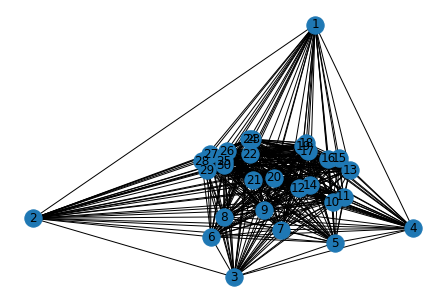

In [11]:
nx.draw(G,with_labels=True)
plt.savefig('n_g.png')
plt.show()

# Importing TARDIS Class

In [13]:
from tardis.plasma.base import BasePlasma as bp

In [14]:
from networkx.drawing.nx_agraph import write_dot

# Writing the graph to a DotFile

In [15]:
write_dot(G,'ionGraph.dot')

# Converting the dotfile as png to view in matplotlib

In [ ]:
!dot ionGraph.dot -Tpng -o image.png

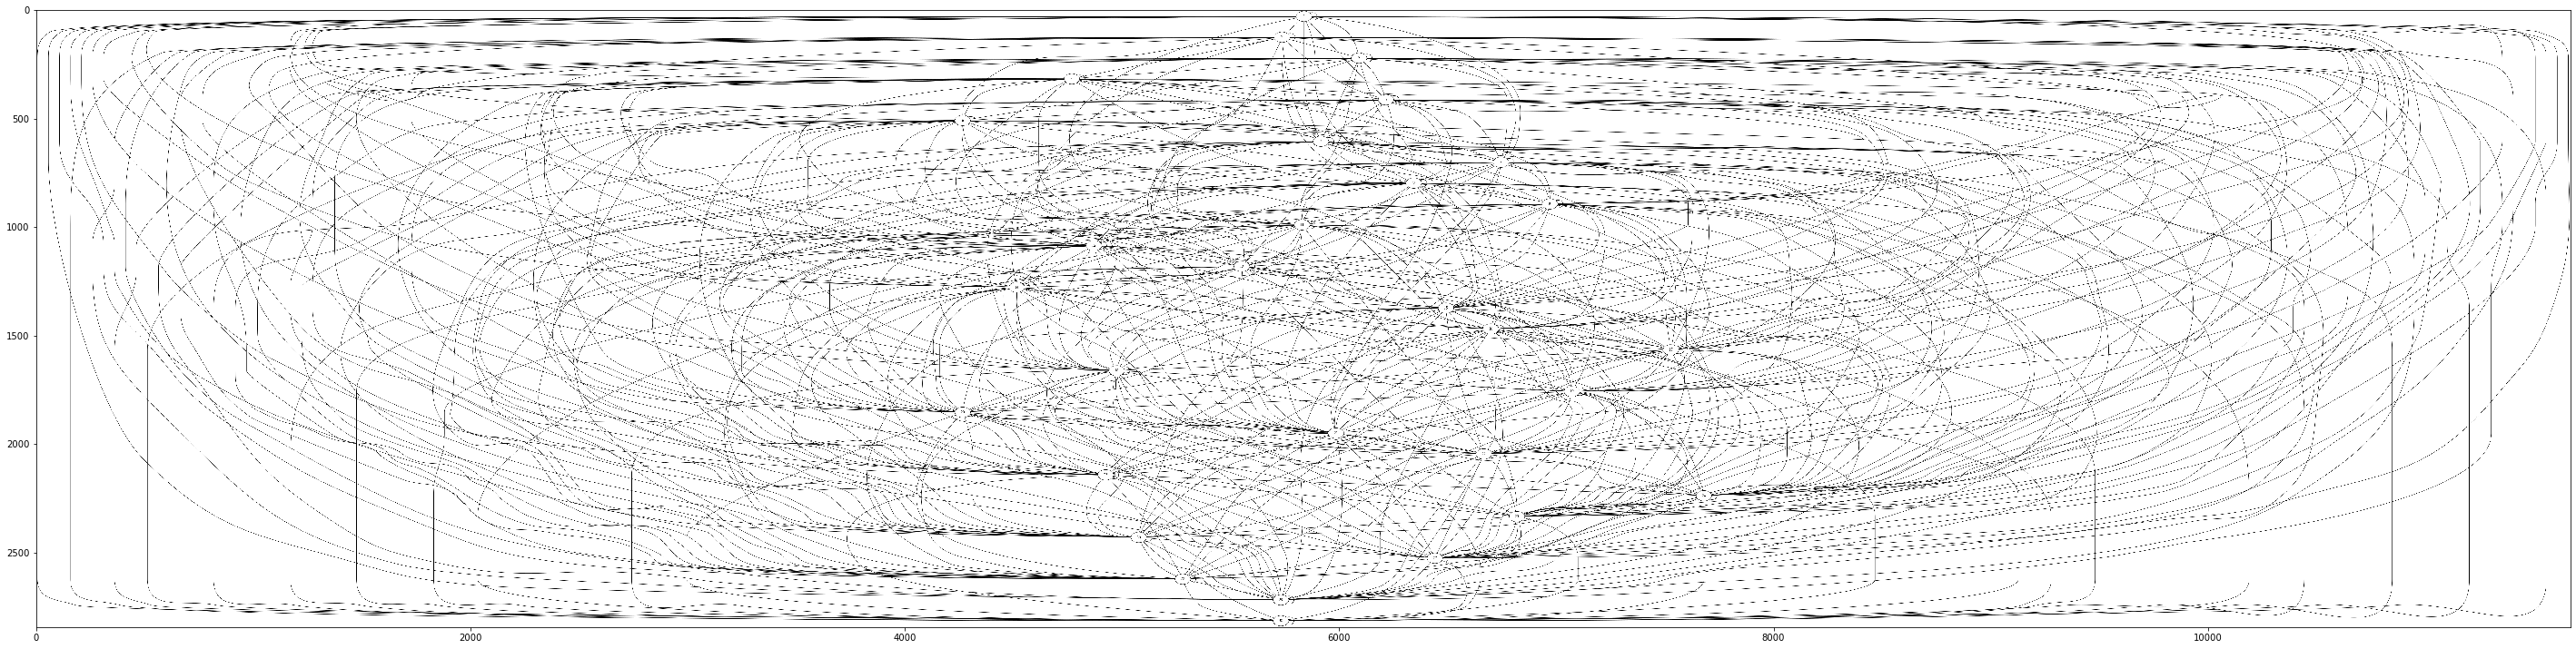

In [4]:
from pylab import rcParams
rcParams['figure.figsize'] = 50,50
import matplotlib.image as mpimg
img=mpimg.imread('image.png')
imgplot = plt.imshow(img)
plt.show()

# Opening DotFile in Pdf

In [5]:
from graphviz import Source
path = 'ionGraph.dot'
s = Source.from_file(path)
s.view()

'ionGraph.dot.pdf'

# Opening DotFile in Notebook

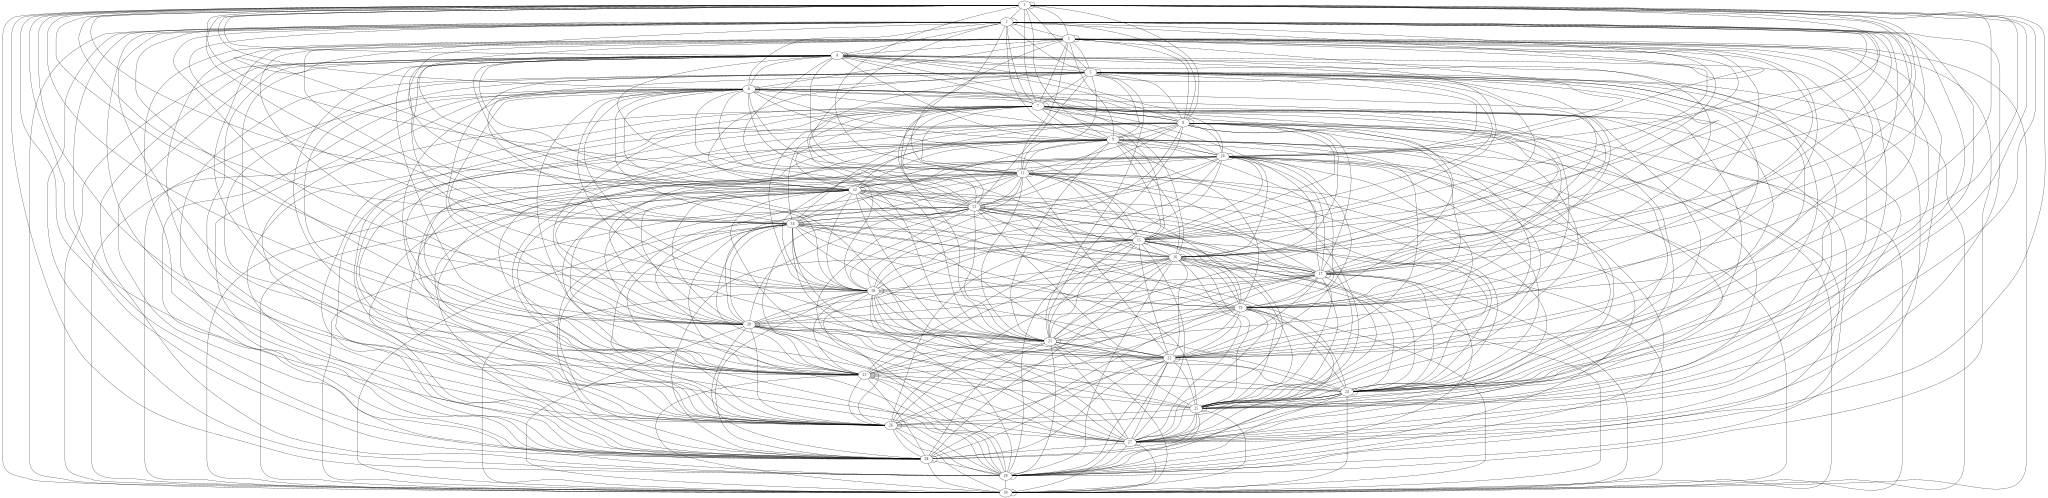

In [6]:
import graphviz
with open("ionGraph.dot") as f:
    dot_graph = f.read()
graphviz.Source(dot_graph)

# Conclusion

1. **Obtaining values from data**
2. **Creating a network graph data from it**
3. **Viewing that graph using networkx**
4. **Converting into a dotfile**
5. **Viewing dotfile using graphviz**